In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def convert_volume(vol):
    vol = vol.replace(',', '')
    if 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    return float(vol)

def train_random_forest(stock_code, file_path):
    # Load data
    stock_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    
    # Convert columns to numeric
    stock_data['Price'] = pd.to_numeric(stock_data['Price'].str.replace(',', ''), errors='coerce')
    stock_data['Open'] = pd.to_numeric(stock_data['Open'].str.replace(',', ''), errors='coerce')
    stock_data['High'] = pd.to_numeric(stock_data['High'].str.replace(',', ''), errors='coerce')
    stock_data['Low'] = pd.to_numeric(stock_data['Low'].str.replace(',', ''), errors='coerce')
    stock_data['Change %'] = stock_data['Change %'].str.replace('%', '').astype(float)
    stock_data['Vol.'] = stock_data['Vol.'].apply(lambda x: convert_volume(str(x)))

    # Ensure the DatetimeIndex is sorted
    stock_data = stock_data.sort_index().asfreq('B')

    # Handle missing values
    stock_data = stock_data.ffill().bfill()

    # Extract features and target variable
    features = stock_data[['Open', 'High', 'Low', 'Vol.', 'Change %']]
    target = stock_data['Price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Filter data for the year 2024 for prediction
    data_2024 = stock_data[stock_data.index.year == 2024]
    features_2024 = data_2024[['Open', 'High', 'Low', 'Vol.', 'Change %']]
    
    # Make predictions for 2024
    predictions_2024 = model.predict(features_2024)

    # Evaluate the model
    mse = mean_squared_error(data_2024['Price'], predictions_2024)
    rmse = np.sqrt(mse)
    r2 = r2_score(data_2024['Price'], predictions_2024)
    
    # Calculate accuracy
    accuracy = 1 - (abs(data_2024['Price'] - predictions_2024) / data_2024['Price']).mean()

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(data_2024.index, data_2024['Price'], label='Actual Prices', color='blue')
    plt.plot(data_2024.index, predictions_2024, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Prices for {stock_code} in 2024')
    plt.legend()
    plt.show()

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print(f'Accuracy: {accuracy}')
    
    return model


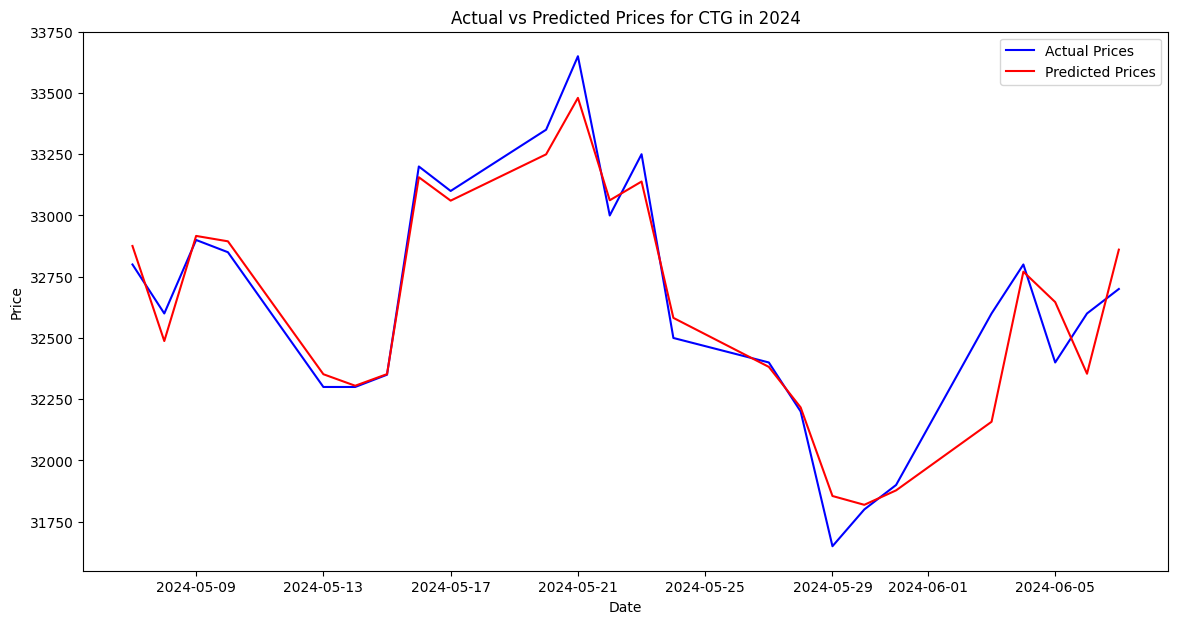

MSE: 19815.833333333332
RMSE: 140.76872285182293
R²: 0.9150497171777314
Accuracy: 0.9970357301574119


In [13]:
model = train_random_forest('CTG', 'D:\\Github anyud\\final\\Data_stock\\CTG Historical Data.csv')

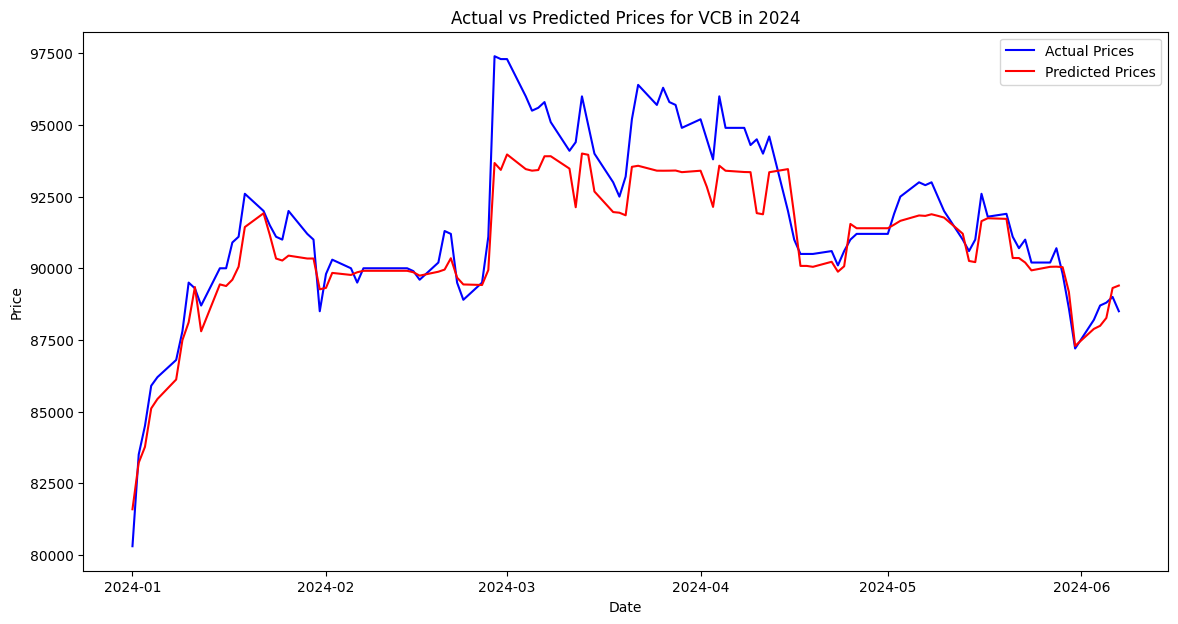

MSE: 1597544.5886634763
RMSE: 1263.9401048560317
R²: 0.8136638470574009
Accuracy: 0.9897956497683245


In [9]:
model = train_random_forest('VCB', 'D:\\Github anyud\\final\\Data_stock\\VCB Historical Data.csv')

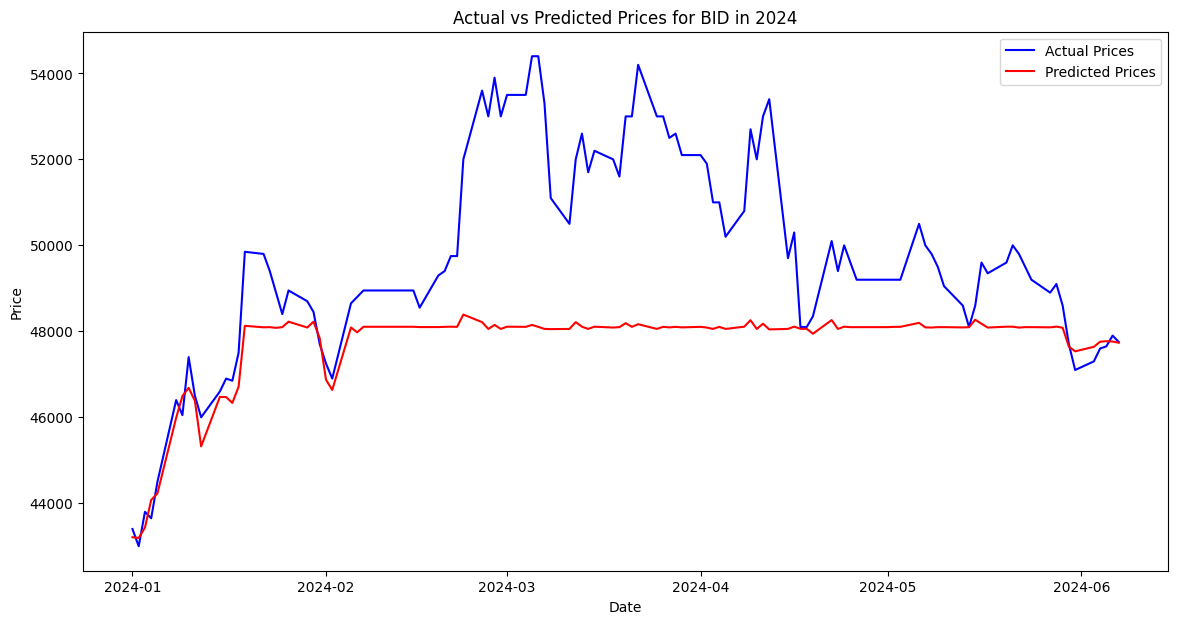

MSE: 7097700.289831305
RMSE: 2664.150951021977
R²: -0.21981521614373611
Accuracy: 0.9619688650009324


In [7]:
model = train_random_forest('BID', 'D:\\Github anyud\\final\\Data_stock\\BID Historical Data.csv')

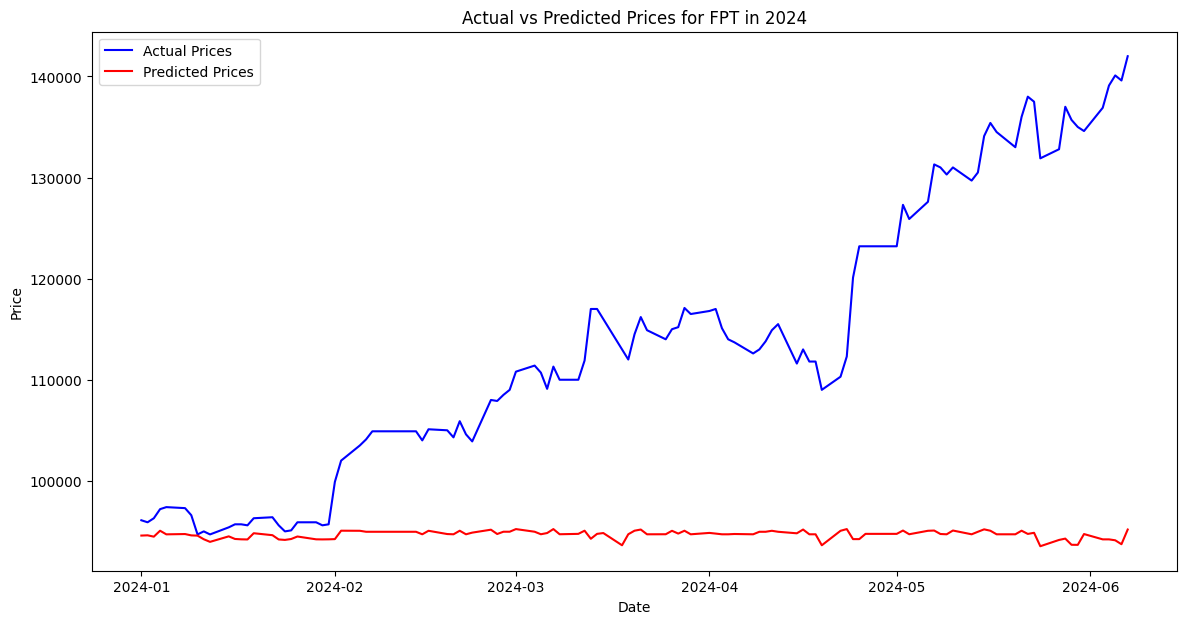

MSE: 545972928.4313496
RMSE: 23366.06360582265
R²: -1.9520323175735825
Accuracy: 0.8445696847544433


In [6]:
model = train_random_forest('FPT', 'D:\\Github anyud\\final\\Data_stock\\FPT Historical Data.csv')

Cross-Validation RMSE: [331.33910688 193.06872649  95.40244754 184.21813885 127.96567643]
Mean Cross-Validation RMSE: 186.39881923825288


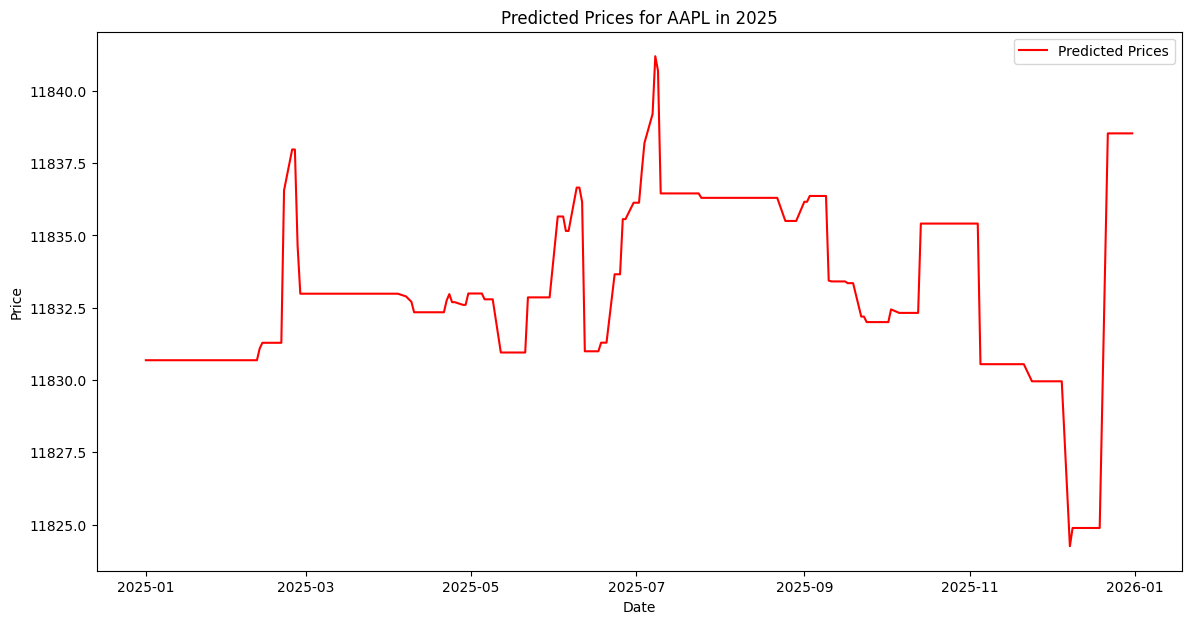

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def convert_volume(vol):
    vol = vol.replace(',', '')
    if 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    return float(vol)

def train_random_forest_for_2025(stock_code, file_path):
    # Load data
    stock_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    
    # Convert columns to numeric
    stock_data['Price'] = pd.to_numeric(stock_data['Price'].str.replace(',', ''), errors='coerce')
    stock_data['Open'] = pd.to_numeric(stock_data['Open'].str.replace(',', ''), errors='coerce')
    stock_data['High'] = pd.to_numeric(stock_data['High'].str.replace(',', ''), errors='coerce')
    stock_data['Low'] = pd.to_numeric(stock_data['Low'].str.replace(',', ''), errors='coerce')
    stock_data['Change %'] = stock_data['Change %'].str.replace('%', '').astype(float)
    stock_data['Vol.'] = stock_data['Vol.'].apply(lambda x: convert_volume(str(x)))

    # Ensure the DatetimeIndex is sorted
    stock_data = stock_data.sort_index().asfreq('B')

    # Handle missing values
    stock_data = stock_data.ffill().bfill()

    # Add a "Day of Year" feature
    stock_data['Day_of_Year'] = stock_data.index.dayofyear

    # Extract features and target variable
    features = stock_data[['Open', 'High', 'Low', 'Vol.', 'Change %', 'Day_of_Year']]
    target = stock_data['Price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    print(f'Cross-Validation RMSE: {cv_rmse}')
    print(f'Mean Cross-Validation RMSE: {cv_rmse.mean()}')

    # Create a placeholder for 2025 with the same structure as the features
    dates_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='B')
    data_2025 = pd.DataFrame(index=dates_2025, columns=features.columns)

    # Fill the feature data for 2025 with realistic varied data
    last_row = features.iloc[-1]
    data_2025['Open'] = last_row['Open']
    data_2025['High'] = last_row['High']
    data_2025['Low'] = last_row['Low']
    data_2025['Vol.'] = last_row['Vol.']
    data_2025['Change %'] = last_row['Change %']
    data_2025['Day_of_Year'] = data_2025.index.dayofyear
    
    # Ensure the data types are inferred correctly
    data_2025 = data_2025.infer_objects()

    # Make predictions for 2025
    predictions_2025 = model.predict(data_2025)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(dates_2025, predictions_2025, label='Predicted Prices', color='red')  # Correctly set the x-axis
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted Prices for {stock_code} in 2025')
    plt.legend()
    plt.show()

    return model

# Example usage
model = train_random_forest_for_2025('AAA', 'D:\\Github anyud\\final\\Data_stock\\AAA Historical Data.csv')
